In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# input_df = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
input_df = df[['Pclass', 'Sex', 'Age','Fare']]
input_df.head()

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500


In [4]:
input_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Sex     891 non-null    object 
 2   Age     714 non-null    float64
 3   Fare    891 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 28.0+ KB


In [5]:
input_df.Age =input_df.Age.fillna(input_df.Age.median())

C:\anaconda3\envs\data\lib\site-packages\pandas\core\generic.py:5507: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [25]:
input_df.Age.sample(10)

233     5.0
125    12.0
52     49.0
303    28.0
178    30.0
261     3.0
322    30.0
880    25.0
534    30.0
757    18.0
Name: Age, dtype: float64

In [6]:
target = df.Survived
target

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [8]:
input_df['Sex'] = le.fit_transform(input_df['Sex'])
input_df['Sex']

<ipython-input-8-f20e3cc01118>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_df['Sex'] = le.fit_transform(input_df['Sex'])


0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int32

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(input_df,target,test_size=0.1,random_state=10) 

In [10]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [11]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [12]:
model.score(X_test, y_test)

0.7666666666666667

In [13]:
X_test

,Pclass,Sex,Age,Fare
590,3,1,35.0,7.1250
131,3,1,20.0,7.0500
628,3,1,26.0,7.8958
195,1,0,58.0,146.5208
230,1,0,35.0,83.4750
...,...,...,...,...
722,2,1,34.0,13.0000
581,1,0,39.0,110.8833
177,1,0,50.0,28.7125
418,2,1,30.0,13.0000


In [14]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1], dtype=int64)

In [15]:
data = X_test
data

,Pclass,Sex,Age,Fare
590,3,1,35.0,7.1250
131,3,1,20.0,7.0500
628,3,1,26.0,7.8958
195,1,0,58.0,146.5208
230,1,0,35.0,83.4750
...,...,...,...,...
722,2,1,34.0,13.0000
581,1,0,39.0,110.8833
177,1,0,50.0,28.7125
418,2,1,30.0,13.0000


In [16]:

data['actual_data'] = y_test
data['predicted_data'] = y_pred


<ipython-input-16-5356fa34ddd4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['actual_data'] = y_test
<ipython-input-16-5356fa34ddd4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['predicted_data'] = y_pred


In [17]:
data.head()

,Pclass,Sex,Age,Fare,actual_data,predicted_data
590,3,1,35.0,7.1250,0,0
131,3,1,20.0,7.0500,0,0
628,3,1,26.0,7.8958,0,0
195,1,0,58.0,146.5208,1,1
230,1,0,35.0,83.4750,1,1


In [18]:
data.to_csv('predicted.csv', index=False)

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(69.0, 0.5, 'Truth')

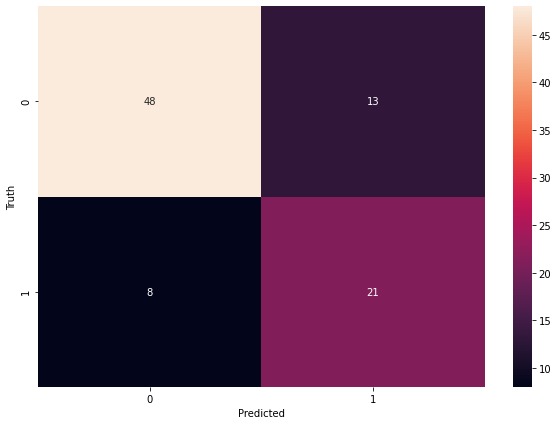

In [20]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')